In [17]:
# Install required libs (run once)
%pip install -q pandas scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [10]:
#extraxting the zip file

from zipfile import ZipFile

dataset = r'D:\ML Projects\Dog Vs Cat Classification\dogs-vs-cats.zip'
extract_path = r'D:\ML Projects\Dog Vs Cat Classification'

with ZipFile(dataset, 'r') as zip:
    zip.extractall(extract_path)

print('Extraction Completed')


Extraction Completed


In [11]:
#extracting test1 zip file

test_dataset = r'D:\ML Projects\Dog Vs Cat Classification\test1.zip'
test = r'D:\ML Projects\Dog Vs Cat Classification'

with ZipFile(test_dataset, 'r') as zip:
    zip.extractall(test)
    
print('Test Extraction Completed')

Test Extraction Completed


In [12]:
#extracting train zip file

train_dataset = r'D:\ML Projects\Dog Vs Cat Classification\train.zip'
train = r'D:\ML Projects\Dog Vs Cat Classification'

with ZipFile(train_dataset, 'r') as zip:
    zip.extractall(train)
    
print('Train Extraction Completed')

Train Extraction Completed


In [13]:
# Count dog and cat images in train dataset
import os

train_dir = r'D:\ML Projects\Dog Vs Cat Classification\train'

# Get all files in train directory
all_files = os.listdir(train_dir)

# Count dog and cat images
dog_count = len([f for f in all_files if f.startswith('dog.')])
cat_count = len([f for f in all_files if f.startswith('cat.')])

print(f"Number of dog images: {dog_count}")
print(f"Number of cat images: {cat_count}")
print(f"Total images: {dog_count + cat_count}")


Number of dog images: 12500
Number of cat images: 12500
Total images: 25000


In [14]:
# Resize and label 2000 images (1000 dogs + 1000 cats) and store in Resized Images folder
import os
import shutil
from PIL import Image
import pandas as pd

# Define paths
train_dir = r'D:\ML Projects\Dog Vs Cat Classification\train'
resized_dir = r'D:\ML Projects\Dog Vs Cat Classification\Resized Images'

# Create output directory if it doesn't exist
if not os.path.exists(resized_dir):
    os.makedirs(resized_dir)
    print(f"Created directory: {resized_dir}")

# Set image size for resizing
image_size = (128, 128)

# Get all files
all_files = os.listdir(train_dir)

# Separate dog and cat images
dog_images = sorted([f for f in all_files if f.startswith('dog.')])
cat_images = sorted([f for f in all_files if f.startswith('cat.')])

# Select first 1000 from each (to get 2000 total)
selected_dogs = dog_images[:1000]
selected_cats = cat_images[:1000]

# Store image info with labels
image_data = []

# Process dog images
print("Processing dog images...")
for idx, dog_image in enumerate(selected_dogs):
    try:
        source_path = os.path.join(train_dir, dog_image)
        
        # Open and resize image
        img = Image.open(source_path)
        img_resized = img.resize(image_size)
        
        # Create new filename
        new_filename = f"dog_{idx:04d}.jpg"
        dest_path = os.path.join(resized_dir, new_filename)
        
        # Save resized image
        img_resized.save(dest_path)
        
        # Store metadata (filename, label)
        image_data.append({'filename': new_filename, 'label': 1})
        
        if (idx + 1) % 200 == 0:
            print(f"  Processed {idx + 1} dog images")
    except Exception as e:
        print(f"Error processing {dog_image}: {str(e)}")

print(f"Total dog images processed: {len(selected_dogs)}")

# Process cat images
print("\nProcessing cat images...")
for idx, cat_image in enumerate(selected_cats):
    try:
        source_path = os.path.join(train_dir, cat_image)
        
        # Open and resize image
        img = Image.open(source_path)
        img_resized = img.resize(image_size)
        
        # Create new filename
        new_filename = f"cat_{idx:04d}.jpg"
        dest_path = os.path.join(resized_dir, new_filename)
        
        # Save resized image
        img_resized.save(dest_path)
        
        # Store metadata (filename, label)
        image_data.append({'filename': new_filename, 'label': 0})
        
        if (idx + 1) % 200 == 0:
            print(f"  Processed {idx + 1} cat images")
    except Exception as e:
        print(f"Error processing {cat_image}: {str(e)}")

print(f"Total cat images processed: {len(selected_cats)}")

# Create a CSV file with labels
labels_csv = os.path.join(resized_dir, 'labels.csv')
df = pd.DataFrame(image_data)
df.to_csv(labels_csv, index=False)
print(f"\nLabels saved to: {labels_csv}")

print(f"\n✓ Total images resized and labeled: {len(image_data)}")
print(f"✓ Images stored in: {resized_dir}")
print(f"✓ Label mapping: 1 = Dog, 0 = Cat")


Processing dog images...
  Processed 200 dog images
  Processed 400 dog images
  Processed 600 dog images
  Processed 800 dog images
  Processed 1000 dog images
Total dog images processed: 1000

Processing cat images...
  Processed 200 cat images
  Processed 400 cat images
  Processed 600 cat images
  Processed 800 cat images
  Processed 1000 cat images
Total cat images processed: 1000

Labels saved to: D:\ML Projects\Dog Vs Cat Classification\Resized Images\labels.csv

✓ Total images resized and labeled: 2000
✓ Images stored in: D:\ML Projects\Dog Vs Cat Classification\Resized Images
✓ Label mapping: 1 = Dog, 0 = Cat


In [15]:
# Convert all resized images to numpy arrays
import numpy as np
import pandas as pd
from PIL import Image
import os

# Define paths
resized_dir = r'D:\ML Projects\Dog Vs Cat Classification\Resized Images'
labels_csv_path = os.path.join(resized_dir, 'labels.csv')

# Load the labels
labels_df = pd.read_csv(labels_csv_path)

# Initialize arrays to store images and labels
X = []  # Images
y = []  # Labels

print("Converting images to numpy arrays...")
print(f"Total images to process: {len(labels_df)}")

# Iterate through each image
for idx, row in labels_df.iterrows():
    try:
        filename = row['filename']
        label = row['label']
        
        # Load image
        image_path = os.path.join(resized_dir, filename)
        img = Image.open(image_path)
        
        # Convert to numpy array
        img_array = np.array(img)
        
        # Append to lists
        X.append(img_array)
        y.append(label)
        
        if (idx + 1) % 500 == 0:
            print(f"  Processed {idx + 1} images")
    except Exception as e:
        print(f"Error processing {filename}: {str(e)}")

# Convert lists to numpy arrays
X = np.array(X)
y = np.array(y)

print(f"\n✓ All images converted to numpy arrays!")
print(f"\nArray Shapes:")
print(f"  X shape: {X.shape}")
print(f"  y shape: {y.shape}")
print(f"\nData Type:")
print(f"  X dtype: {X.dtype}")
print(f"  y dtype: {y.dtype}")
print(f"\nLabel Distribution:")
print(f"  Dogs (label=1): {np.sum(y == 1)}")
print(f"  Cats (label=0): {np.sum(y == 0)}")

# Optional: Save the numpy arrays for later use
npz_path = os.path.join(resized_dir, 'images_arrays.npz')
np.savez(npz_path, X=X, y=y)
print(f"\n✓ Numpy arrays saved to: {npz_path}")


Converting images to numpy arrays...
Total images to process: 2000
  Processed 500 images
  Processed 1000 images
  Processed 1500 images
  Processed 2000 images

✓ All images converted to numpy arrays!

Array Shapes:
  X shape: (2000, 128, 128, 3)
  y shape: (2000,)

Data Type:
  X dtype: uint8
  y dtype: int64

Label Distribution:
  Dogs (label=1): 1000
  Cats (label=0): 1000

✓ Numpy arrays saved to: D:\ML Projects\Dog Vs Cat Classification\Resized Images\images_arrays.npz


In [18]:
# Split data into train and test, and scale
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np

print("Splitting data into train and test sets...")

# Split data: 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"✓ Data split completed!")
print(f"\nOriginal Data Shapes:")
print(f"  X_train shape: {X_train.shape}")
print(f"  X_test shape: {X_test.shape}")
print(f"  y_train shape: {y_train.shape}")
print(f"  y_test shape: {y_test.shape}")

# Normalize pixel values to 0-1 range
print(f"\nScaling pixel values to 0-1 range...")
X_train_scaled = X_train.astype('float32') / 255.0
X_test_scaled = X_test.astype('float32') / 255.0

print(f"✓ Data scaling completed!")
print(f"\nScaled Data Shapes:")
print(f"  X_train_scaled shape: {X_train_scaled.shape}")
print(f"  X_test_scaled shape: {X_test_scaled.shape}")
print(f"  y_train shape: {y_train.shape}")
print(f"  y_test shape: {y_test.shape}")

print(f"\nData Type:")
print(f"  X_train_scaled dtype: {X_train_scaled.dtype}")
print(f"  Pixel value range: [{X_train_scaled.min():.4f}, {X_train_scaled.max():.4f}]")

# Train-test split statistics
print(f"\nTrain-Test Split Statistics:")
print(f"  Training samples: {len(X_train)} ({len(X_train)/len(X)*100:.1f}%)")
print(f"  Testing samples: {len(X_test)} ({len(X_test)/len(X)*100:.1f}%)")
print(f"  Training dogs: {np.sum(y_train == 1)}")
print(f"  Training cats: {np.sum(y_train == 0)}")
print(f"  Testing dogs: {np.sum(y_test == 1)}")
print(f"  Testing cats: {np.sum(y_test == 0)}")

print(f"\n✓ Data is now split and scaled, ready for model training!")


Splitting data into train and test sets...
✓ Data split completed!

Original Data Shapes:
  X_train shape: (1600, 128, 128, 3)
  X_test shape: (400, 128, 128, 3)
  y_train shape: (1600,)
  y_test shape: (400,)

Scaling pixel values to 0-1 range...
✓ Data scaling completed!

Scaled Data Shapes:
  X_train_scaled shape: (1600, 128, 128, 3)
  X_test_scaled shape: (400, 128, 128, 3)
  y_train shape: (1600,)
  y_test shape: (400,)

Data Type:
  X_train_scaled dtype: float32
  Pixel value range: [0.0000, 1.0000]

Train-Test Split Statistics:
  Training samples: 1600 (80.0%)
  Testing samples: 400 (20.0%)
  Training dogs: 800
  Training cats: 800
  Testing dogs: 200
  Testing cats: 200

✓ Data is now split and scaled, ready for model training!


Building the Nural Network

TensorFlow 2.20.0 is already installed

Loading pre-trained MobileNet v2 model...
9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 10s 1us/step
Freezing base model layers...
✓ Base model loaded with 154 layers
✓ All base layers frozen for transfer learning

Building custom classification head...
✓ Custom model built successfully!

Compiling model...
✓ Model compiled!

Model Summary:
Total parameters: 2,586,177
Trainable parameters: 328,193
Non-trainable parameters: 2,257,984

Training MobileNet v2 model...
Training samples: 1600
Validation samples: 400
----------------------------------------------------------------------
Epoch 1/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 17s 246ms/step - accuracy: 0.9056 - loss: 0.2313 - val_accuracy: 0.9550 - val_loss: 0.1408 - learning_rate: 0.0010
Epoch 2/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 11s 216ms/step - accuracy: 0.9506 - loss: 0.1204 - val_accuracy: 0.9550 - val_loss: 0.1083 - learning_rate: 0.0010
Epoch 3/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 11s 215ms/step - accuracy: 0.9631 - lo

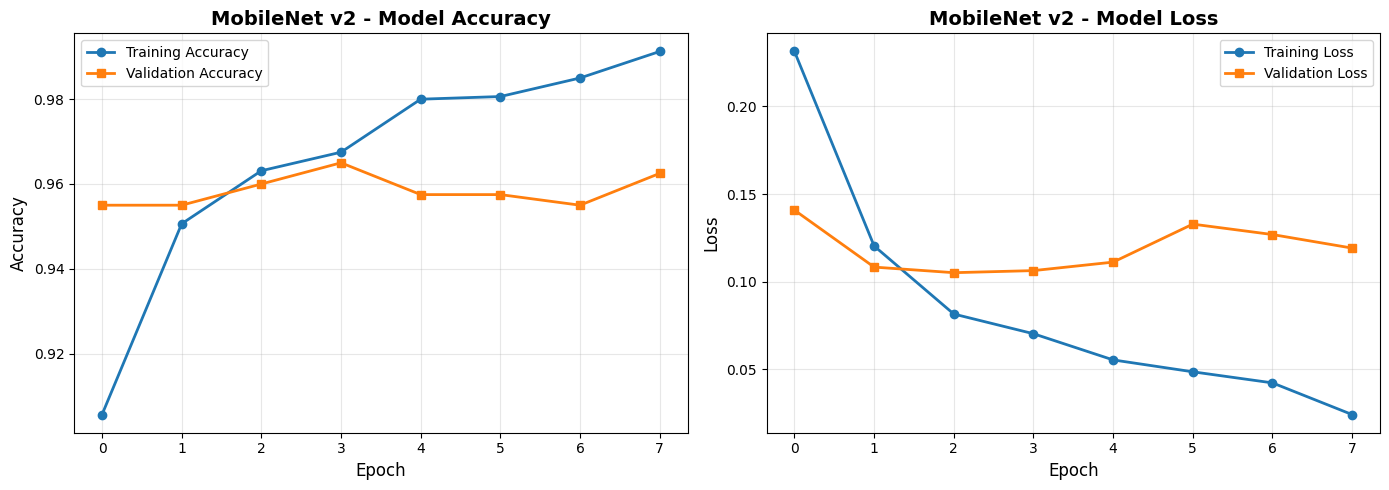

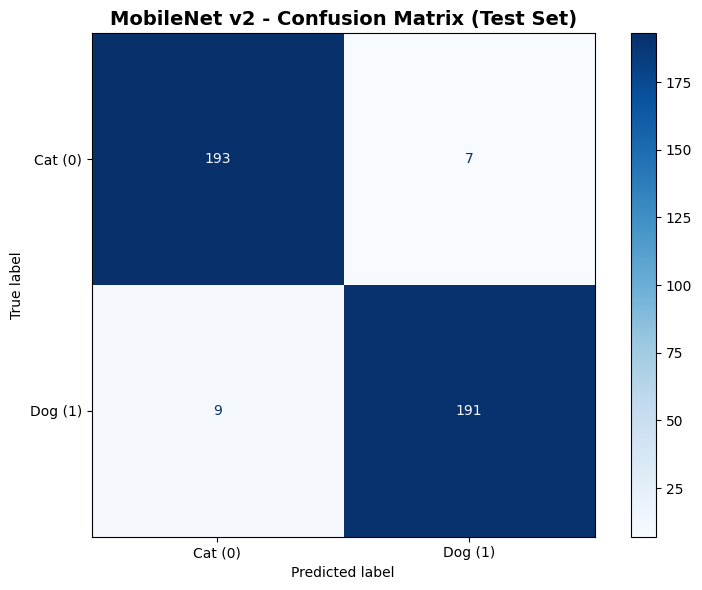


✓ MobileNet v2 Transfer Learning Completed Successfully!
✓ Model trained on 1600 images
✓ Tested on 400 images
✓ Final Test Accuracy: 96.00%


In [19]:
# Install TensorFlow if not already installed
try:
    import tensorflow as tf
    print(f"TensorFlow {tf.__version__} is already installed")
except ImportError:
    print("Installing TensorFlow...")
    %pip install -q tensorflow
    import tensorflow as tf
    print(f"✓ TensorFlow {tf.__version__} installed successfully")

# Train with Pre-trained MobileNet v2
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import matplotlib.pyplot as plt

print("\nLoading pre-trained MobileNet v2 model...")

# Load pre-trained MobileNet v2 (without top classification layer)
base_model = MobileNetV2(
    input_shape=(128, 128, 3),
    include_top=False,
    weights='imagenet'
)

# Freeze base model layers for transfer learning
print("Freezing base model layers...")
base_model.trainable = False

print(f"✓ Base model loaded with {len(base_model.layers)} layers")
print(f"✓ All base layers frozen for transfer learning")

# Create custom top layers for binary classification
print("\nBuilding custom classification head...")
inputs = tf.keras.Input(shape=(128, 128, 3))
x = base_model(inputs, training=False)
x = GlobalAveragePooling2D()(x)
x = Dropout(0.3)(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.3)(x)
outputs = Dense(1, activation='sigmoid')(x)  # Binary classification (0 or 1)

model = Model(inputs, outputs)

print("✓ Custom model built successfully!")

# Compile the model
print("\nCompiling model...")
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

print("✓ Model compiled!")

# Display model summary
print("\nModel Summary:")
print(f"Total parameters: {model.count_params():,}")
print(f"Trainable parameters: {sum([tf.size(w).numpy() for w in model.trainable_weights]):,}")
print(f"Non-trainable parameters: {sum([tf.size(w).numpy() for w in model.non_trainable_weights]):,}")

# Define callbacks
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True,
    verbose=1
)

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=3,
    min_lr=1e-7,
    verbose=1
)

# Train the model
print("\nTraining MobileNet v2 model...")
print(f"Training samples: {len(X_train_scaled)}")
print(f"Validation samples: {len(X_test_scaled)}")
print("-" * 70)

history = model.fit(
    X_train_scaled, y_train,
    validation_data=(X_test_scaled, y_test),
    epochs=20,
    batch_size=32,
    callbacks=[early_stopping, reduce_lr],
    verbose=1
)

print("\n" + "=" * 70)
print("✓ Training completed!")
print("=" * 70)

# Evaluate on test set
print("\nEvaluating on test set...")
test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test, verbose=0)
print(f"\nFinal Results:")
print(f"  Test Loss: {test_loss:.4f}")
print(f"  Test Accuracy: {test_accuracy:.4f} ({test_accuracy*100:.2f}%)")

# Make predictions
y_pred_prob = model.predict(X_test_scaled, verbose=0)
y_pred = (y_pred_prob > 0.5).astype(int).flatten()

# Classification metrics
from sklearn.metrics import classification_report, confusion_matrix

print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['Cat (0)', 'Dog (1)']))

print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
print(cm)

# Plot training history
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Accuracy plot
axes[0].plot(history.history['accuracy'], label='Training Accuracy', linewidth=2, marker='o')
axes[0].plot(history.history['val_accuracy'], label='Validation Accuracy', linewidth=2, marker='s')
axes[0].set_xlabel('Epoch', fontsize=12)
axes[0].set_ylabel('Accuracy', fontsize=12)
axes[0].set_title('MobileNet v2 - Model Accuracy', fontsize=14, fontweight='bold')
axes[0].legend(fontsize=10)
axes[0].grid(True, alpha=0.3)

# Loss plot
axes[1].plot(history.history['loss'], label='Training Loss', linewidth=2, marker='o')
axes[1].plot(history.history['val_loss'], label='Validation Loss', linewidth=2, marker='s')
axes[1].set_xlabel('Epoch', fontsize=12)
axes[1].set_ylabel('Loss', fontsize=12)
axes[1].set_title('MobileNet v2 - Model Loss', fontsize=14, fontweight='bold')
axes[1].legend(fontsize=10)
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Plot confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay

fig, ax = plt.subplots(figsize=(8, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Cat (0)', 'Dog (1)'])
disp.plot(ax=ax, cmap='Blues', values_format='d')
plt.title('MobileNet v2 - Confusion Matrix (Test Set)', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

print("\n" + "=" * 70)
print("✓ MobileNet v2 Transfer Learning Completed Successfully!")
print("=" * 70)
print(f"✓ Model trained on {len(X_train)} images")
print(f"✓ Tested on {len(X_test)} images")
print(f"✓ Final Test Accuracy: {test_accuracy*100:.2f}%")
